In [2]:
import numpy as np
from scipy.io import wavfile as io
import matplotlib.pyplot as plt 
from playsound import playsound
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io
import os



def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;

def file(name_file,signal,rate):
    signal = 0.7*normaliser_son_mono(signal)  ##pour protéger vos oreilles des saturations de vos enceintes 
    scaled = np.round(32767*signal)
    signal = scaled.astype(np.int16)
    io.write(name_file, rate, signal)


def son(f0,durée_note):
    fe = 44100  
    te = 1/fe
    t= np.arange(0, durée_note, te)
    return np.cos(2*(np.pi)*f0*t)*2* np.sin(t*(np.pi)/durée_note)

def calcul_periodogramme(x,Fe):
    ### périodogramme moyenné. Sections de 0.1 seconde
    N=len(x)
    N1=int(np.floor(0.1*Fe))
    K=int(np.floor(N/N1))
    w=signal.hamming(N1)
    ind1 = 0
    ind2 = N1-1
    b = w*x[ind1:(ind2+1)] 
    f, B = signal.periodogram(b, Fe)
    B=B/N1
    while ind2+N1<N:
        ind1=ind1+N1
        ind2=ind2+N1
        b=w*x[ind1:(ind2+1)]
        f, aux = signal.periodogram(b, Fe)
        B=B+aux/N1
    B=B/K
    #B=10*np.log10(B)
    return(f,B)


[233.08188076 246.94165063 261.6255653 ]


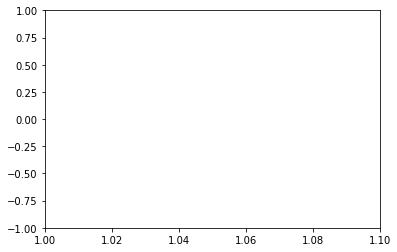

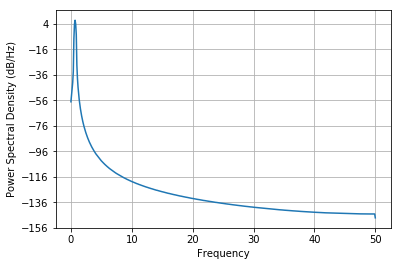

In [10]:
def Gamme_temperée(Nb_Octave, note_fondamental):
    alpha = 2**(1/12)
    OCTAVE = np.zeros(1+12*Nb_Octave)
    for i in range (1+12*Nb_Octave):
        OCTAVE[i]= note_fondamental*(alpha**i)
    return OCTAVE

def creation_liste_note(fondamental_gamme, liste_indice_note):
    gamme = Gamme_temperée(2,fondamental_gamme)
    res =  np.zeros(len(liste_indice_note))
    for k in range (len(liste_indice_note)):
        res[k]= gamme[liste_indice_note[k]]
    return res

print(creation_liste_note(220,[1,2,3]))

def suite_note(liste_note,liste_duree_note):
    fe = 44100  
    te = 1/fe
    x_total = []
    for i in range (len(liste_note)):
        t= np.arange(0, liste_duree_note[i], te)
        x_tampon = son(liste_note[i],liste_duree_note[i])
        x_total = np.concatenate((x_total,x_tampon))
    somme_duree_note = 0
    for k in range (len(liste_duree_note)):
        somme_duree_note += liste_duree_note[k]
    time = np.arange(0,somme_duree_note,te)
    #plt.figure(1)
    #plt.plot(time,x_total)
    #plt.figure(2)
    #plt.plot(liste_note)
    #playsound(file_name)
    return x_total

def creer_fichier(file_name , suiteNote):
    file(file_name,suiteNote,44100)
    

#suite_note('Octave10.wav',Gamme_temperée(1,440),0.5)


#a = suite_note('Octave7.wav',Gamme_temperée(2,440),0.5)


def creation_duree(liste_valeur,tempo):
    FreqNOIRE = tempo/60 #Hz
    d_NOIRE = 1/FreqNOIRE
    duree_note = []
    duree_note[:] = [4*d_NOIRE/x for x in liste_valeur]
    return duree_note

liste_test_Marseillaise = [3,3,3,8,8,10,10,15]
duree_note_test_Marseillaise = [0.5,0.5,0.5,1,1,1,0.5,2]
liste_note_test_Marseillaise = creation_liste_note(220,liste_test_Marseillaise)

liste_test_YN = [12,11,12,13,0,12,11,12,13,12,0,12,11,12,19,18]
duree_note_test_YN = [0.5,0.5,0.5,0.5,0.5,1,0.5,0.5,0.5,0.5,0.5,1,0.5,0.5,0.5,1,1]
duree_note_test_YN[:] = [x * 0.7 for x in duree_note_test_YN]
liste_note_test_YN = creation_liste_note(110,liste_test_YN)


liste_test_indice = [3,5,7,8,7,5]
liste_test_duree = creation_duree([4,8,8,4,4,1],80)
liste_note_test = creation_liste_note(220,liste_test_indice)

suite_note_test = suite_note(liste_note_test,liste_test_duree) 

TEST = creer_fichier('TESTexo25.wav',suite_note_test)
playsound('TESTexo25.wav')

#print(Octave(3,220))

#f , By = calcul_periodogramme(a,44100)
#plt.plot(f,By,'r')
plt.axis([1, 1.1,-1,1])
plt.figure(3)
plt.psd(suite_note_test, 1024,100)

plt.show()


